In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

### Find coordinates

In [4]:
data = open('Cities.csv', "r")
coordinates = []
x = []
y = []
for d in data:
    coordinate = list(map(float, d.split()[1:]))
    x.append(coordinate[1])
    y.append(coordinate[0])
    coordinates.append([coordinate[1], coordinate[0]]) 
coordinates = np.array(coordinates)

### Find the number of cities

In [5]:
cities_number = coordinates.shape[0]

### Normalize the data

In [6]:
r =(max(x)-min(x)) / (max(y)-min(y)) , 1 
ratio = np.array(r) / max(r)
normalized_coordinates = (coordinates - np.array([min(x), min(y)])) / ratio

### Select the nearest city

In [7]:
def nearest_city(network, coordinate):
  distance = np.linalg.norm(network - coordinate, axis=1)
  return np.where(distance == np.amin(distance))

### Find neighbors of a city

In [8]:
def find_neighbors(o, p, d):
    if p < 1:
      p = 1

    sigma = np.absolute(o - np.arange(d))
    distance = np.minimum(sigma, d - sigma)

    return np.exp(-(pow(distance, 2)) / (2*(pow(p, 2))))

### Plot results

In [9]:
def plot_city_network(network, coordinates):
  fig = plt.figure(figsize=(5, 5), frameon = False)
  axis = fig.add_axes([0,0,1,1])
  axis.set_aspect('equal', adjustable='datalim')
  plt.axis('off')
  axis.scatter(coordinates[:, 0], coordinates[:, 1], color='red', s=4)
  axis.plot(network[:,0], network[:,1], 'r.', ls='-', color='#0063ba', markersize=2)
  plt.show()

epoch 1 : Cities and Network


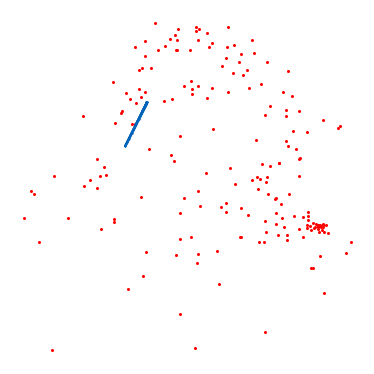

epoch 1001 : Cities and Network


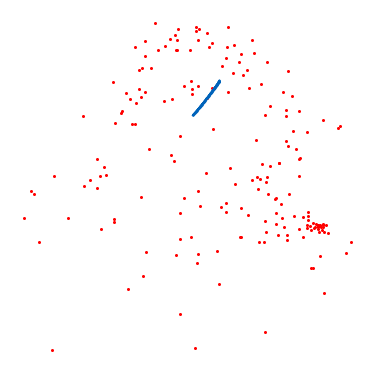

epoch 2001 : Cities and Network


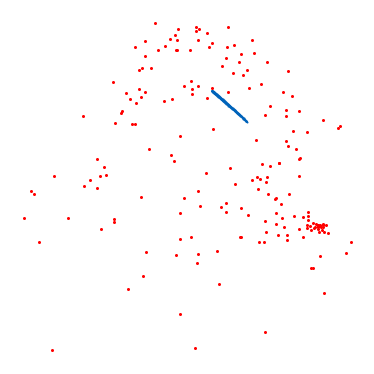

epoch 3001 : Cities and Network


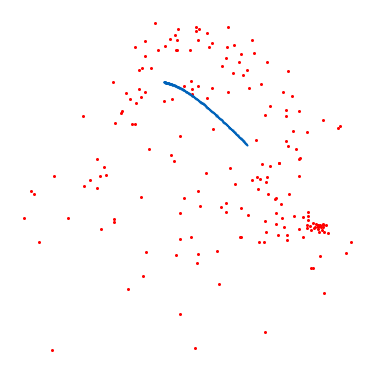

epoch 4001 : Cities and Network


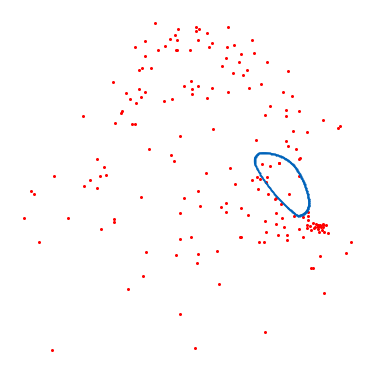

epoch 5001 : Cities and Network


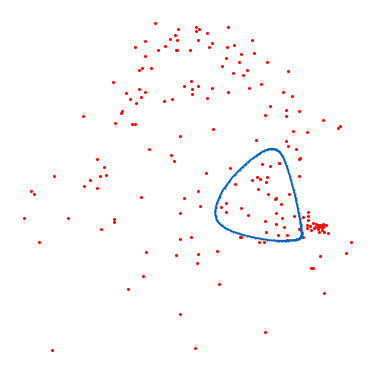

epoch 6001 : Cities and Network


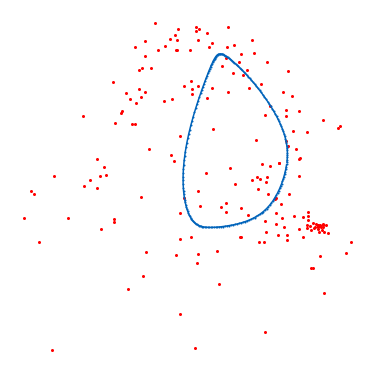

epoch 7001 : Cities and Network


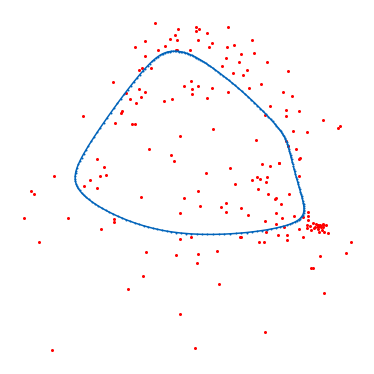

epoch 8001 : Cities and Network


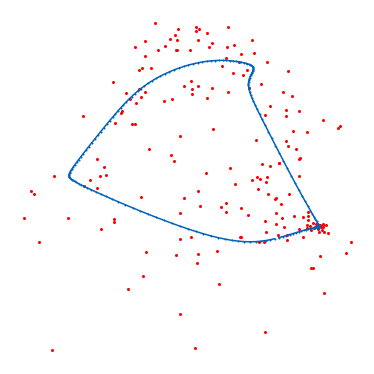

epoch 9001 : Cities and Network


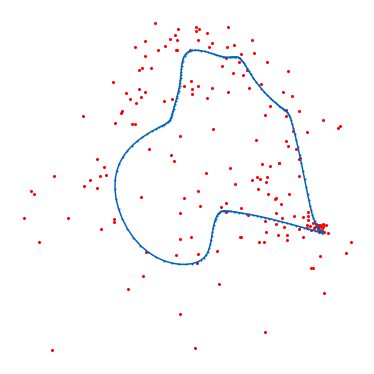

epoch 10001 : Cities and Network


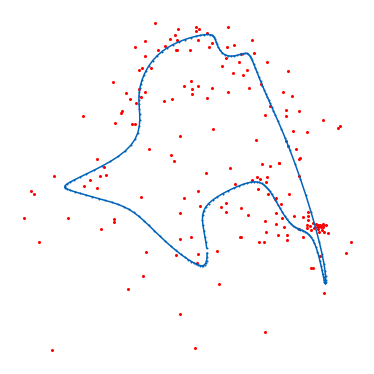

epoch 11001 : Cities and Network


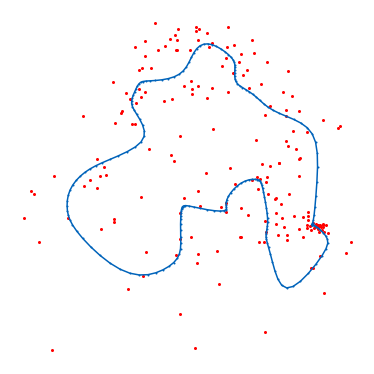

epoch 12001 : Cities and Network


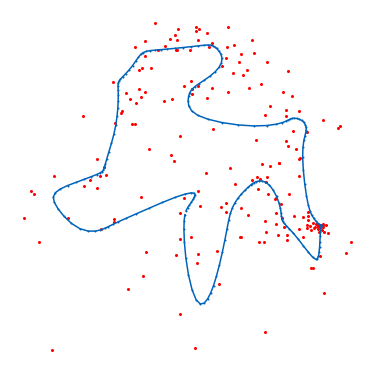

epoch 13001 : Cities and Network


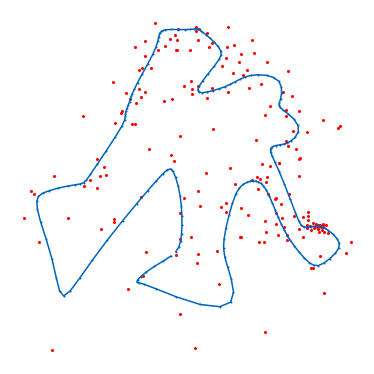

epoch 14001 : Cities and Network


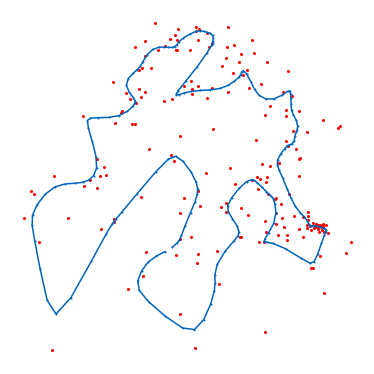

epoch 15001 : Cities and Network


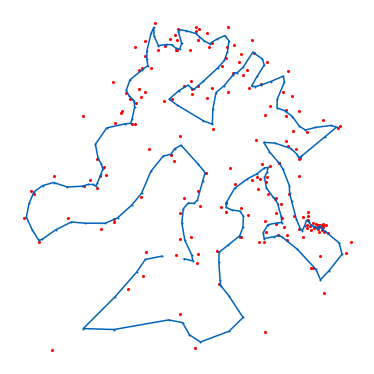

epoch 16001 : Cities and Network


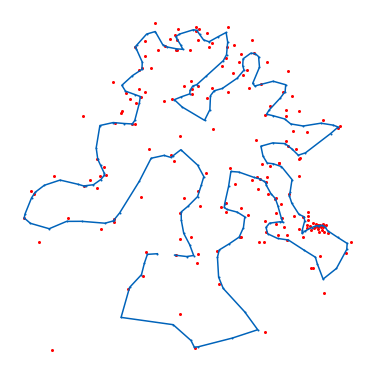

epoch 17001 : Cities and Network


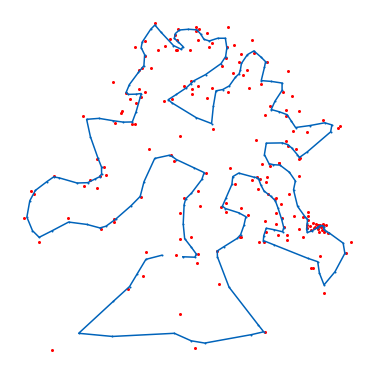

epoch 18001 : Cities and Network


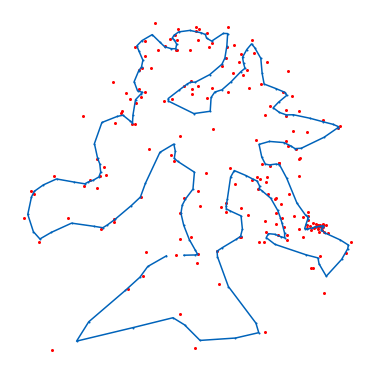

epoch 19001 : Cities and Network


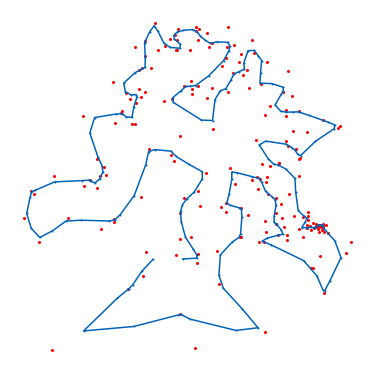

epoch 20001 : Cities and Network


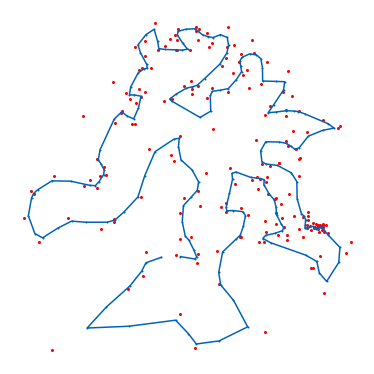

epoch 21001 : Cities and Network


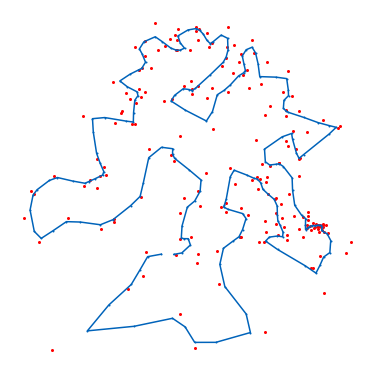

epoch 22001 : Cities and Network


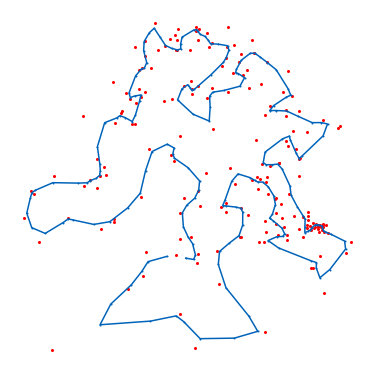

epoch 23001 : Cities and Network


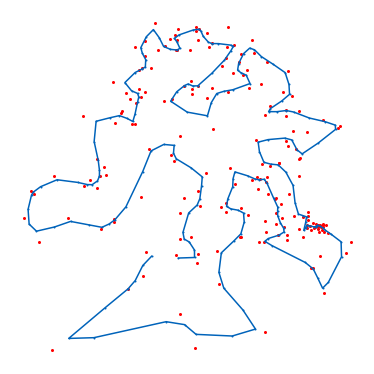

epoch 24001 : Cities and Network


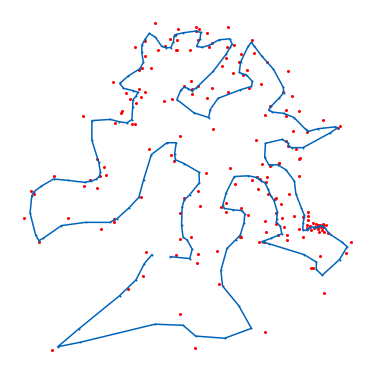

Radius has completely decayed at 24487 iterations


In [14]:
lr = 0.8
r = cities_number * 8

# Kohonen network
kohonen_network = np.random.rand(cities_number, 2)

for i in range(100000):
  if not i % 100:
    print('\t> Iteration {}/{}'.format(i, 100000), end="\r")
  random_city = np.random.randint(0, cities_number)
  winner = nearest_city(kohonen_network, normalized_coordinates[random_city])[0][0]
  neighbours = find_neighbors(winner, r//10, cities_number)
  kohonen_network += neighbours[:,np.newaxis] * lr * (normalized_coordinates[random_city] - kohonen_network)
  lr = lr * 0.99997
  r = r * 0.9997

  if not i % 1000:
    print(f'epoch {i+1} : Cities and Network')
    plot_city_network(kohonen_network, normalized_coordinates)

  if r < 1:
    print('Radius has completely decayed at {} iterations'.format(i))
    break

  if lr < 0.001:
    print('Learning rate has completely decayed at {} iterations'.format(i))
    break